In [123]:
import altair as alt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [174]:
sns.set_style("ticks")

## Compare tip attributes

Count the number of tips present at non-zero frequency in the "no delay" analysis compared to the number of tips with "ideal" and "realistic" delays. Additionally, compare the frequencies of tips that are present in the latter two analyses with the "no delay" analysis.

In [77]:
no_delay_tips = pd.read_csv(
    "results/builds/simulated/simulated_no_delay/tip_attributes.tsv",
    sep="\t",
    parse_dates=["timepoint"],
    usecols=["strain", "timepoint", "frequency"],
)

In [78]:
ideal_delay_tips = pd.read_csv(
    "results/builds/simulated/simulated_ideal_delay/tip_attributes.tsv",
    sep="\t",
    parse_dates=["timepoint"],
    usecols=["strain", "timepoint", "frequency"],
)

In [79]:
realistic_delay_tips = pd.read_csv(
    "results/builds/simulated/simulated_realistic_delay/tip_attributes.tsv",
    sep="\t",
    parse_dates=["timepoint"],
    usecols=["strain", "timepoint", "frequency"],
)

In [80]:
no_delay_tips.head()

,strain,timepoint,frequency
0,sample_3200_77,2016-10-01,0.000015
1,sample_3228_83,2016-10-01,0.000473
2,sample_3240_64,2016-10-01,0.001654
3,sample_3252_69,2016-10-01,0.005085
4,sample_3268_29,2016-10-01,0.018573


In [85]:
tips = no_delay_tips.merge(
    ideal_delay_tips,
    on=["strain", "timepoint"],
    how="left",
    suffixes=["", "_ideal"],
).merge(
    realistic_delay_tips,
    on=["strain", "timepoint"],
    how="left",
    suffixes=["", "_realistic"],
)  

In [88]:
tips.head(10)

,strain,timepoint,frequency,frequency_ideal,frequency_realistic
0,sample_3200_77,2016-10-01,0.000015,0.000025,0.000052
1,sample_3228_83,2016-10-01,0.000473,0.000758,0.001612
2,sample_3240_64,2016-10-01,0.001654,0.002652,0.005640
3,sample_3252_69,2016-10-01,0.005085,0.008151,0.017334
4,sample_3268_29,2016-10-01,0.018573,0.029773,0.063318
5,sample_3288_68,2016-10-01,0.067842,0.108754,0.231283
6,sample_3312_47,2016-10-01,0.199686,0.320108,0.680761
7,sample_3332_55,2016-10-01,0.330481,0.529778,NaN
8,sample_3344_6,2016-10-01,0.376191,NaN,NaN
9,sample_3312_47,2017-04-01,0.000074,0.000245,0.000245


In [93]:
total_tips_no_delay = sum(~pd.isnull(tips["frequency"]))

In [95]:
total_tips_no_delay

445

In [96]:
total_tips_ideal_delay = sum(~pd.isnull(tips["frequency_ideal"]))

In [97]:
total_tips_ideal_delay

377

In [98]:
total_tips_ideal_delay / total_tips_no_delay

0.8471910112359551

In [99]:
total_tips_realistic_delay = sum(~pd.isnull(tips["frequency_realistic"]))

In [100]:
total_tips_realistic_delay

288

In [101]:
total_tips_realistic_delay / total_tips_no_delay

0.647191011235955

In [127]:
tips = tips.fillna(0.0)

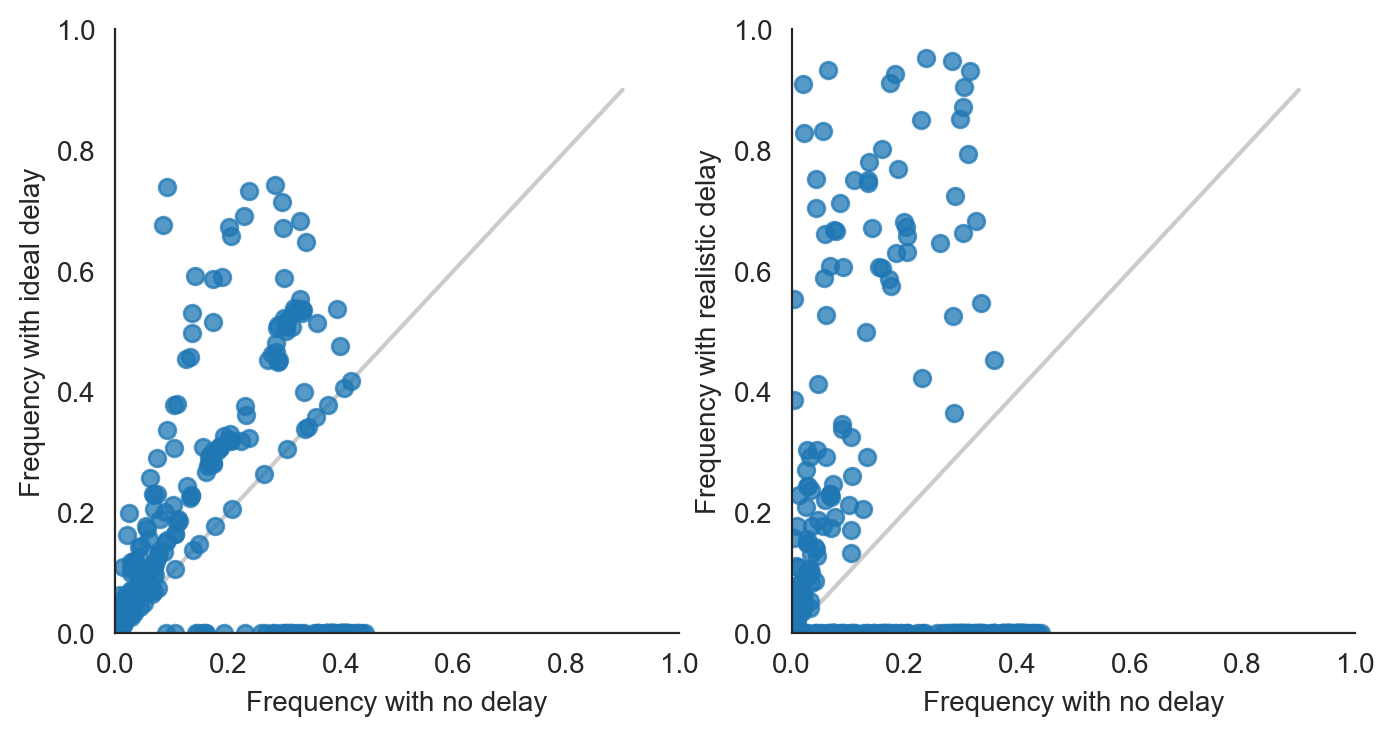

In [145]:
fig, all_axes = plt.subplots(1, 2, figsize=(8, 4), dpi=200)
axes = all_axes.flatten()

axes[0].plot(
    tips["frequency"],
    tips["frequency_ideal"],
    "o",
    alpha=0.75,
)

axes[0].plot(
    np.arange(0, 1, 0.1),
    np.arange(0, 1, 0.1),
    color="#CCCCCC",
    zorder=-10,
)
axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 1)

axes[0].set_xlabel("Frequency with no delay")
axes[0].set_ylabel("Frequency with ideal delay")

axes[1].plot(
    tips["frequency"],
    tips["frequency_realistic"],
    "o",
    alpha=0.75,
)

axes[1].plot(
    np.arange(0, 1, 0.1),
    np.arange(0, 1, 0.1),
    color="#CCCCCC",
    zorder=-10,
)
axes[1].set_xlim(0, 1)
axes[1].set_ylim(0, 1)

axes[1].set_xlabel("Frequency with no delay")
axes[1].set_ylabel("Frequency with realistic delay")

sns.despine()

## Compare distances

Compare the model distances between the estimated and observed future populations when the estimated populations depend on different data delay conditions. We expect that the "no delay" scenario will be closer to the true future on average followed by the "ideal" and then the "realistic" conditions.

In [179]:
distances = pd.read_csv("results/distance_model_errors.tsv", sep="\t", parse_dates=["validation_timepoint"])

In [182]:
distances = distances.rename(columns={"validation_timepoint": "timepoint"})

In [188]:
sample_to_delay_type = {
    "simulated_no_delay": "none",
    "simulated_ideal_delay": "ideal",
    "simulated_realistic_delay": "realistic",
}

In [189]:
distances["delay_type"] = distances["sample"].map(sample_to_delay_type)

In [190]:
distances

,delta_month,error_type,future_timepoint,null_validation_error,optimal_validation_error,predictors,sample,type,validation_error,validation_n,timepoint,delay_type
0,6,test,2017-04-01,5.591370,3.213318,normalized_fitness,simulated_no_delay,simulated,3.959563,9,2016-10-01,none
1,6,test,2017-10-01,6.083168,4.201030,normalized_fitness,simulated_no_delay,simulated,4.406794,9,2017-04-01,none
2,6,test,2018-04-01,6.529592,5.396437,normalized_fitness,simulated_no_delay,simulated,6.111320,9,2017-10-01,none
3,6,test,2018-10-01,9.458508,5.683103,normalized_fitness,simulated_no_delay,simulated,7.606665,9,2018-04-01,none
4,6,test,2019-04-01,9.374762,6.148530,normalized_fitness,simulated_no_delay,simulated,6.834199,9,2018-10-01,none
...,...,...,...,...,...,...,...,...,...,...,...,...
280,12,test,2038-10-01,7.905873,7.216056,normalized_fitness,simulated_ideal_delay,simulated,8.243872,7,2037-10-01,ideal
281,12,test,2039-04-01,8.005046,4.794590,normalized_fitness,simulated_ideal_delay,simulated,5.395689,8,2038-04-01,ideal
282,12,test,2039-10-01,13.311567,8.727635,normalized_fitness,simulated_ideal_delay,simulated,9.073833,7,2038-10-01,ideal
283,12,test,2040-04-01,11.245121,8.571375,normalized_fitness,simulated_ideal_delay,simulated,9.571329,9,2039-04-01,ideal


In [185]:
distances.loc[:, ["timepoint", "delta_month", "sample", "validation_error"]]

,timepoint,delta_month,sample,validation_error
0,2016-10-01,6,simulated_no_delay,3.959563
1,2017-04-01,6,simulated_no_delay,4.406794
2,2017-10-01,6,simulated_no_delay,6.111320
3,2018-04-01,6,simulated_no_delay,7.606665
4,2018-10-01,6,simulated_no_delay,6.834199
...,...,...,...,...
280,2037-10-01,12,simulated_ideal_delay,8.243872
281,2038-04-01,12,simulated_ideal_delay,5.395689
282,2038-10-01,12,simulated_ideal_delay,9.073833
283,2039-04-01,12,simulated_ideal_delay,9.571329


In [194]:
distances.groupby(["delay_type", "delta_month"])["validation_error"].mean()

delay_type  delta_month
ideal       6               8.474700
            12              9.581964
none        6               7.780327
            12              9.184981
realistic   6               9.338378
            12             10.482415
Name: validation_error, dtype: float64

In [234]:
distances.groupby(["delay_type", "delta_month"])["validation_error"].median().sort_values()

delay_type  delta_month
none        6              7.113415
ideal       6              8.174933
realistic   6              8.897160
ideal       12             9.431179
none        12             9.525527
realistic   12             9.746723
Name: validation_error, dtype: float64

In [237]:
# Only reducing forecast horizon from 12 to 6 months
9.746723 - 8.897160

0.8495629999999998

In [239]:
# Only reducing submission delay
9.746723 - 9.431179

0.31554399999999916

In [240]:
# Sum of effects
(9.746723 - 8.897160) + (9.746723 - 9.431179)

1.165106999999999

In [238]:
# Reducing forecast horizon and submission delay
9.746723 - 8.174933

1.57179

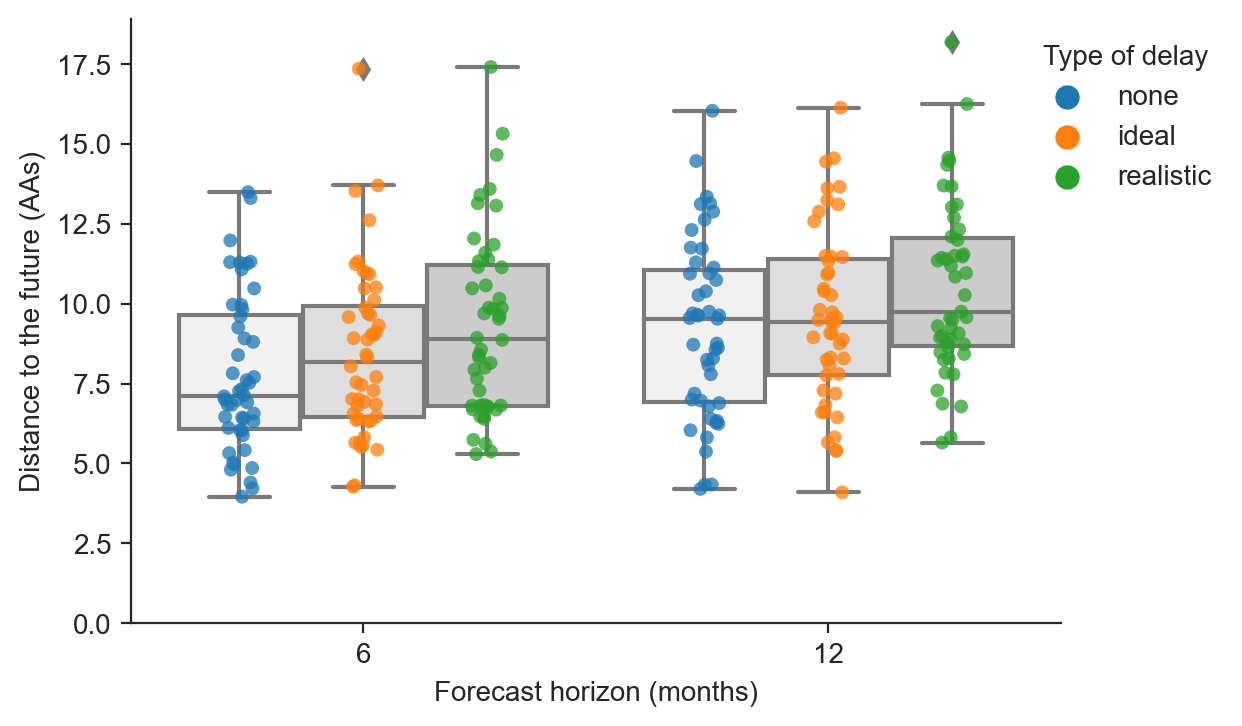

In [233]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=200)
sns.boxplot(
    x="delta_month",
    y="validation_error",
    hue="delay_type",
    hue_order=("none", "ideal", "realistic"),
    data=distances,
    color="#CCCCCC",
    ax=ax,
)
sns.stripplot(
    x="delta_month",
    y="validation_error",
    hue="delay_type",
    data=distances,
    hue_order=("none", "ideal", "realistic"),
    alpha=0.75,
    ax=ax,
    dodge=True,
)

ax.set_ylim(bottom=0)

handles, labels = ax.get_legend_handles_labels()

ax.legend(
    bbox_to_anchor=(0.95, 1),
    handles=handles[3:],
    labels=labels[3:],
    loc="upper left",
    title="Type of delay",
    frameon=False,
)
ax.set_xlabel("Forecast horizon (months)")
ax.set_ylabel("Distance to the future (AAs)")

sns.despine()

### Observed validation error

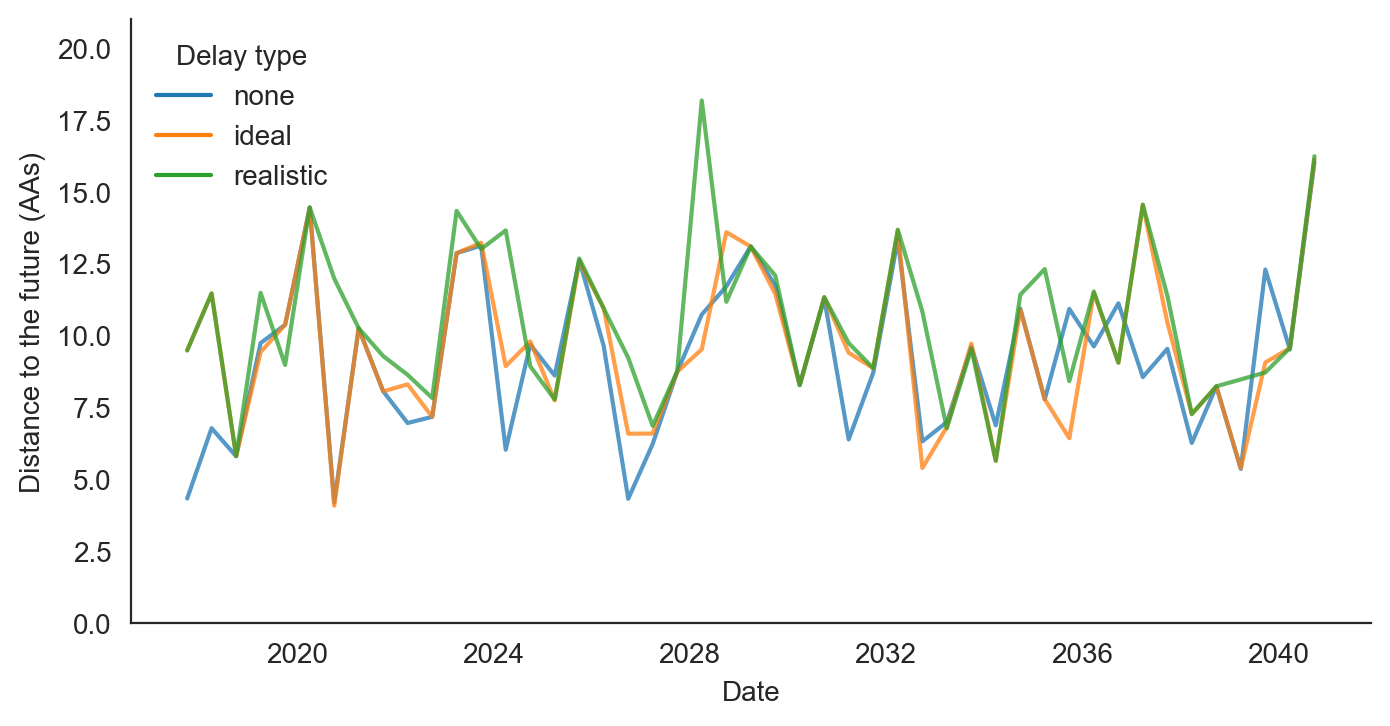

In [171]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=200)

sns.lineplot(
    x="timepoint",
    y="validation_error",
    data=distances,
    hue="delay_type",
    hue_order=["none", "ideal", "realistic"],
    ax=ax,
    alpha=0.75,
)

ax.set_xlabel("Date")
ax.set_ylabel("Distance to the future (AAs)")

ax.legend(
    loc="upper left",
    frameon=False,
    title="Delay type",
)

ax.set_ylim(bottom=0, top=21)

sns.despine()

### Relative distances per timepoint

In [241]:
distances.head()

,delta_month,error_type,future_timepoint,null_validation_error,optimal_validation_error,predictors,sample,type,validation_error,validation_n,timepoint,delay_type
0,6,test,2017-04-01,5.591370,3.213318,normalized_fitness,simulated_no_delay,simulated,3.959563,9,2016-10-01,none
1,6,test,2017-10-01,6.083168,4.201030,normalized_fitness,simulated_no_delay,simulated,4.406794,9,2017-04-01,none
2,6,test,2018-04-01,6.529592,5.396437,normalized_fitness,simulated_no_delay,simulated,6.111320,9,2017-10-01,none
3,6,test,2018-10-01,9.458508,5.683103,normalized_fitness,simulated_no_delay,simulated,7.606665,9,2018-04-01,none
4,6,test,2019-04-01,9.374762,6.148530,normalized_fitness,simulated_no_delay,simulated,6.834199,9,2018-10-01,none


In [246]:
distances_per_timepoint = distances.loc[:, ["timepoint", "delay_type", "delta_month", "validation_error"]].pivot_table(
    values="validation_error",
    index=["timepoint", "delta_month"],
    columns=["delay_type"],
).reset_index()

In [247]:
distances_per_timepoint.head()

delay_type,timepoint,delta_month,ideal,none,realistic
0,2016-10-01,6,8.313516,3.959563,8.314442
1,2016-10-01,12,9.492932,4.342399,9.492940
2,2017-04-01,6,9.873762,4.406794,9.873762
3,2017-04-01,12,11.472816,6.788205,11.472816
4,2017-10-01,6,6.354263,6.111320,6.771329


In [248]:
distances_per_timepoint["relative_ideal"] = (
    distances_per_timepoint["ideal"] - distances_per_timepoint["none"]
)

In [249]:
distances_per_timepoint["relative_realistic"] = (
    distances_per_timepoint["realistic"] - distances_per_timepoint["none"]
)

In [250]:
distances_per_timepoint.head()

delay_type,timepoint,delta_month,ideal,none,realistic,relative_ideal,relative_realistic
0,2016-10-01,6,8.313516,3.959563,8.314442,4.353953,4.354879
1,2016-10-01,12,9.492932,4.342399,9.492940,5.150534,5.150541
2,2017-04-01,6,9.873762,4.406794,9.873762,5.466969,5.466969
3,2017-04-01,12,11.472816,6.788205,11.472816,4.684612,4.684612
4,2017-10-01,6,6.354263,6.111320,6.771329,0.242943,0.660010


In [251]:
distances_relative_to_no_delay = distances_per_timepoint.melt(
    id_vars=["timepoint", "delta_month"],
    value_vars=["relative_ideal", "relative_realistic"],
    var_name="delay_type",
    value_name="relative_distance",
)

In [252]:
distances_relative_to_no_delay.head()

,timepoint,delta_month,delay_type,relative_distance
0,2016-10-01,6,relative_ideal,4.353953
1,2016-10-01,12,relative_ideal,5.150534
2,2017-04-01,6,relative_ideal,5.466969
3,2017-04-01,12,relative_ideal,4.684612
4,2017-10-01,6,relative_ideal,0.242943


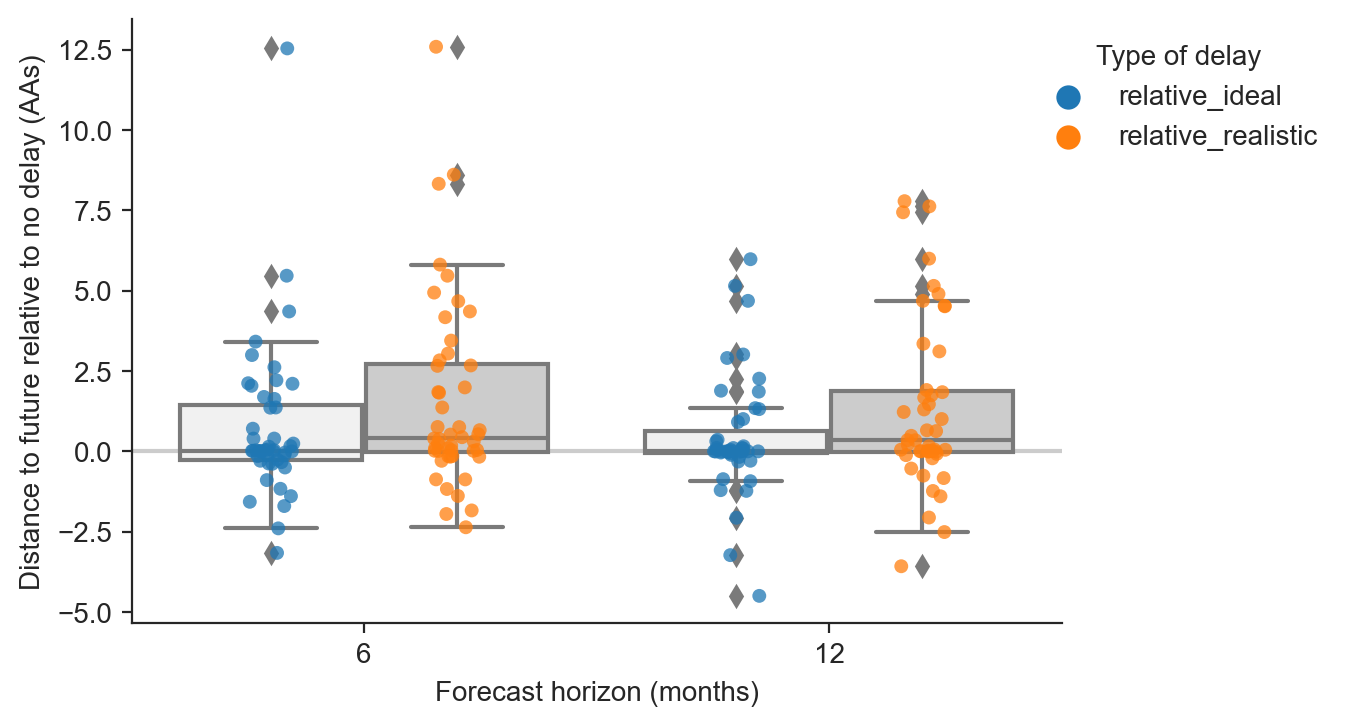

In [257]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=200)

sns.boxplot(
    x="delta_month",
    y="relative_distance",
    hue="delay_type",
    data=distances_relative_to_no_delay,
    hue_order=("relative_ideal", "relative_realistic",),
    ax=ax,
    color="#CCCCCC",
)

sns.stripplot(
    x="delta_month",
    y="relative_distance",
    hue="delay_type",
    data=distances_relative_to_no_delay,
    hue_order=("relative_ideal", "relative_realistic",),
    ax=ax,
    alpha=0.75,
    dodge=True,
)

ax.axhline(y=0.0, color="#CCCCCC", zorder=-10)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
    bbox_to_anchor=(0.95, 1),
    handles=handles[2:],
    labels=labels[2:],
    loc="upper left",
    title="Type of delay",
    frameon=False,
)

ax.set_xlabel("Forecast horizon (months)")
ax.set_ylabel("Distance to future relative to no delay (AAs)")

sns.despine()

In [67]:
alt.Chart(distances_relative_to_no_delay).mark_line(point=True).encode(
    x="timepoint:T",
    y="relative_distance:Q",
    color="delay_type:N",
    tooltip=["timepoint:T", "delay_type:N", "relative_distance:Q"],
).properties(
    width=600,
    height=400,
)

alt.Chart(...)

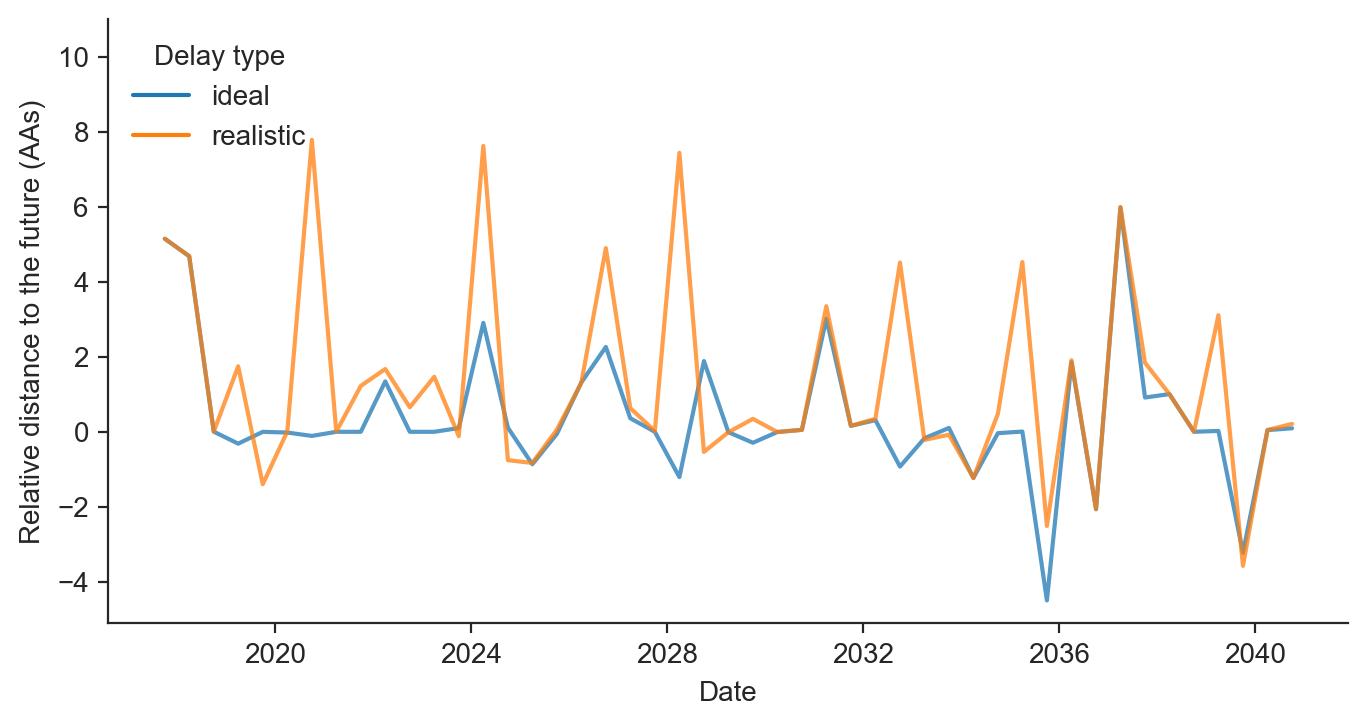

In [177]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=200)

sns.lineplot(
    x="timepoint",
    y="relative_distance",
    data=distances_relative_to_no_delay,
    hue="delay_type",
    #hue_order=["none", "ideal", "realistic"],
    ax=ax,
    alpha=0.75,
)

ax.set_xlabel("Date")
ax.set_ylabel("Relative distance to the future (AAs)")

ax.legend(
    loc="upper left",
    frameon=False,
    title="Delay type",
)

ax.set_ylim(top=11)

sns.despine()

In [70]:
distances_relative_to_no_delay["farther_from_no_delay"] = (distances_relative_to_no_delay["relative_distance"] > 0)

In [104]:
farther_from_no_delay = distances_relative_to_no_delay.groupby("delay_type")["farther_from_no_delay"].agg(["sum", "count"]).reset_index()

In [106]:
farther_from_no_delay["proportion_farther"] = farther_from_no_delay["sum"] / farther_from_no_delay["count"]

In [107]:
farther_from_no_delay

,delay_type,sum,count,proportion_farther
0,ideal,25,47,0.531915
1,realistic,34,47,0.723404
